<a href="https://colab.research.google.com/github/rifkihariyanto25/Strategi-Algoritma/blob/main/Strategi_Algoritma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalasi library yang dibutuhkan
!pip install networkx matplotlib



In [ ]:
import itertools  # Untuk permutasi pada Brute Force
import sys        # Untuk menggunakan nilai maksimum
import time       # Untuk mengukur waktu eksekusi
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
def visualize_initial_graph(graph, title="Graf Awal"):
    G = nx.Graph()

    # Tambahkan semua edge dengan bobot dari graf
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)

    # Posisi node menggunakan spring layout
    pos = nx.spring_layout(G, seed=42)  # Seed for consistency

    # Gambar graf
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="orange", font_size=10, font_weight="bold")

    # Gambar bobot pada setiap edge
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

    # Tambahkan judul
    plt.title(title, fontsize=15)
    plt.show()


# **GRAF 1**

In [ ]:
# Representasi graf dengan jarak antar lokasi (berbentuk dictionary)
graph = {
    'Hotel Malioboro Yogyakarta': {'Tugu Jogja': 3, 'Taman Pintar': 5, 'Jln. Malioboro': 1},
    'Tugu Jogja': {'Hotel Malioboro Yogyakarta': 1, 'Taman Pintar': 2, 'Keraton Jogja': 6},
    'Taman Pintar': {'Hotel Malioboro Yogyakarta': 3, 'Tugu Jogja': 5, 'Gembira Loka': 1},
    'Jln. Malioboro': {'Hotel Malioboro Yogyakarta': 4, 'Keraton Jogja': 3},
    'Keraton Jogja': {'Tugu Jogja': 6, 'Jln. Malioboro': 1, 'Gembira Loka': 3},
    'Gembira Loka': {'Taman Pintar': 3, 'Keraton Jogja': 3, 'Candi Prambanan': 2},
    'Candi Prambanan': {'Gembira Loka': 4, 'Monumen Yogya Kembali': 8},
    'Monumen Yogya Kembali': {'Candi Prambanan': 9, 'Hotel Malioboro Yogyakarta': 10}
}

start_point = "Hotel Malioboro Yogyakarta"

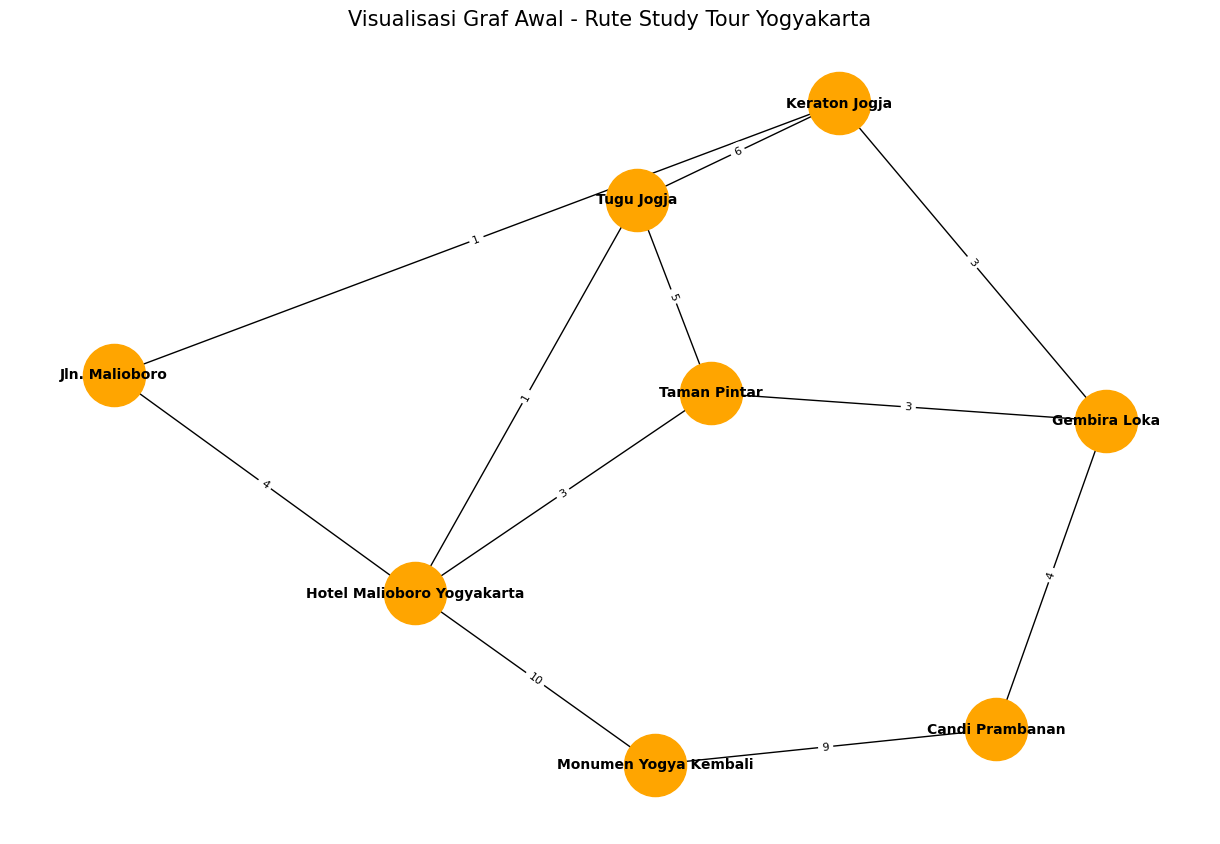

Total jarak: 44 km


In [ ]:
# Visualisasi graf awal
visualize_initial_graph(graph, title="Visualisasi Graf Awal - Rute Study Tour Yogyakarta")

def hitung_total_jarak(graph):
    # Set untuk menyimpan edge yang sudah dihitung
    counted_edges = set()
    total_distance = 0

    # Iterasi setiap node dan tetangganya
    for node in graph:
        for neighbor, distance in graph[node].items():
            # Membuat edge yang unik (diurutkan untuk menghindari duplikasi)
            edge = tuple(sorted([node, neighbor]))

            # Hanya menghitung jika edge belum pernah dihitung
            if edge not in counted_edges:
                total_distance += distance
                counted_edges.add(edge)

    return total_distance

# Menghitung total jarak
total = hitung_total_jarak(graph)
print(f"Total jarak: {total} km")

BACKTRACKING

In [ ]:
# Backtracking Implementation
def tsp_backtracking(graph, start):
    visited = set()  # Set to keep track of visited nodes
    best_path = []   # To store the best path found
    min_cost = [sys.maxsize]  # To store the minimum cost, initialized with a large value

    # Recursive function to perform depth-first search (DFS)
    def dfs(current, path, cost):
        # If all nodes have been visited, check if we can return to the start
        if len(path) == len(graph):
            if start in graph[current]:  # Check if there's a path back to the start
                total_cost = cost + graph[current][start]  # Complete the cycle
                if total_cost < min_cost[0]:  # Update best path and minimum cost if better
                    min_cost[0] = total_cost
                    best_path.clear()
                    best_path.extend(path + [start])
            return

        # Explore neighbors (unvisited nodes)
        for neighbor, distance in graph[current].items():
            if neighbor not in visited:
                visited.add(neighbor)
                dfs(neighbor, path + [neighbor], cost + distance)
                visited.remove(neighbor)  # Backtrack by removing the neighbor from visited

    visited.add(start)
    dfs(start, [start], 0)  # Start DFS from the start node
    return best_path, min_cost[0]

    # Run Backtracking
start_time = time.time()  # Record start time
back_path, back_cost = tsp_backtracking(graph, start_point)
back_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BACKTRACKING ===")
print(f"Best Path: {back_path}")
print(f"Total Cost: {back_cost}")
print(f"Execution Time: {back_time:.4f} seconds")

=== BACKTRACKING ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 33
Execution Time: 0.0001 seconds


BRUTE FORCE

In [ ]:
# Brute Force Implementation with Return to Start
def tsp_brute_force(graph, start):
    min_cost = sys.maxsize
    best_path = []
    nodes = list(graph.keys())
    nodes.remove(start)  # Remove the starting point from the list for permutations

    # Iterate over all permutations of the nodes except the starting point
    for perm in itertools.permutations(nodes):
        cost = 0
        valid = True
        path = [start] + list(perm)  # Start the path from the starting point

        # Calculate the cost for the path
        for i in range(len(path) - 1):
            if path[i + 1] in graph[path[i]]:
                cost += graph[path[i]][path[i + 1]]
            else:
                valid = False
                break

        # Add the cost to return to the start point to complete the cycle
        if valid and start in graph[path[-1]]:  # Ensure there's a path back to the start
            cost += graph[path[-1]][start]  # Add the return cost
            if cost < min_cost:
                min_cost = cost
                best_path = path + [start]  # Complete the cycle by returning to the start

    return best_path, min_cost

    # Run Brute Force
start_time = time.time()  # Record start time
brute_path, brute_cost = tsp_brute_force(graph, start_point)
brute_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BRUTE FORCE ===")
print(f"Best Path: {brute_path}")
print(f"Total Cost: {brute_cost}")
print(f"Execution Time: {brute_time:.4f} seconds")

=== BRUTE FORCE ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 33
Execution Time: 0.0298 seconds


GREEDY

In [ ]:
# Greedy Implementation
def tsp_greedy(graph, start):
    visited = set()
    path = [start]
    current = start
    total_cost = 0

    while len(visited) < len(graph):
        visited.add(current)
        next_node = None
        min_distance = sys.maxsize

        # Find the nearest unvisited neighbor
        for neighbor, distance in graph[current].items():
            if neighbor not in visited and distance < min_distance:
                next_node = neighbor
                min_distance = distance

        # If no more valid neighbors (incomplete graph case)
        if next_node is None:
            break

        # Move to the nearest neighbor
        path.append(next_node)
        total_cost += min_distance
        current = next_node

    # Return to the starting point to complete the cycle
    if start in graph[current]:
        path.append(start)
        total_cost += graph[current][start]

    return path, total_cost


# Run Greedy Algorithm
start_time = time.time()  # Record the start time
greedy_path, greedy_cost = tsp_greedy(graph, start_point)
greedy_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== GREEDY ===")
print(f"Path: {greedy_path}")
print(f"Total Cost: {greedy_cost}")
print(f"Execution Time: {greedy_time:.4f} seconds")

=== GREEDY ===
Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 27
Execution Time: 0.0001 seconds


In [ ]:
# Compare All Algorithms
def compare_algorithms(graph, start):
    # Brute Force
    start_time = time.time()
    brute_path, brute_cost = tsp_brute_force(graph, start)
    brute_time = time.time() - start_time

    # Backtracking
    start_time = time.time()
    back_path, back_cost = tsp_backtracking(graph, start)
    back_time = time.time() - start_time

    # Greedy
    start_time = time.time()
    greedy_path, greedy_cost = tsp_greedy(graph, start)
    greedy_time = time.time() - start_time

    # Print Results
    print("=== PERBANDINGAN ALGORITMA ===")
    print(f"Brute Force   : Cost = {brute_cost}, Time = {brute_time:.4f} seconds, Path = {brute_path}")
    print(f"Backtracking  : Cost = {back_cost}, Time = {back_time:.4f} seconds, Path = {back_path}")
    print(f"Greedy        : Cost = {greedy_cost}, Time = {greedy_time:.4f} seconds, Path = {greedy_path}")

# Jalankan Perbandingan
compare_algorithms(graph, start_point)


=== PERBANDINGAN ALGORITMA ===
Brute Force   : Cost = 33, Time = 0.0211 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Backtracking  : Cost = 33, Time = 0.0001 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Greedy        : Cost = 27, Time = 0.0000 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']


# **GRAF 2**

In [ ]:
# Representasi graf dengan jarak antar lokasi (berbentuk dictionary)
graph = {
    'Hotel Malioboro Yogyakarta': {'Tugu Jogja': 2, 'Taman Pintar': 4, 'Jln. Malioboro': 3},
    'Tugu Jogja': {'Hotel Malioboro Yogyakarta': 2, 'Taman Pintar': 3, 'Keraton Jogja': 5},
    'Taman Pintar': {'Hotel Malioboro Yogyakarta': 4, 'Tugu Jogja': 3, 'Gembira Loka': 6},
    'Jln. Malioboro': {'Hotel Malioboro Yogyakarta': 3, 'Keraton Jogja': 2},
    'Keraton Jogja': {'Tugu Jogja': 5, 'Jln. Malioboro': 2, 'Gembira Loka': 4},
    'Gembira Loka': {'Taman Pintar': 6, 'Keraton Jogja': 4, 'Candi Prambanan': 8},
    'Candi Prambanan': {'Gembira Loka': 8, 'Monumen Yogya Kembali': 9},
    'Monumen Yogya Kembali': {'Candi Prambanan': 9, 'Hotel Malioboro Yogyakarta': 10}
}

start_point = "Hotel Malioboro Yogyakarta"


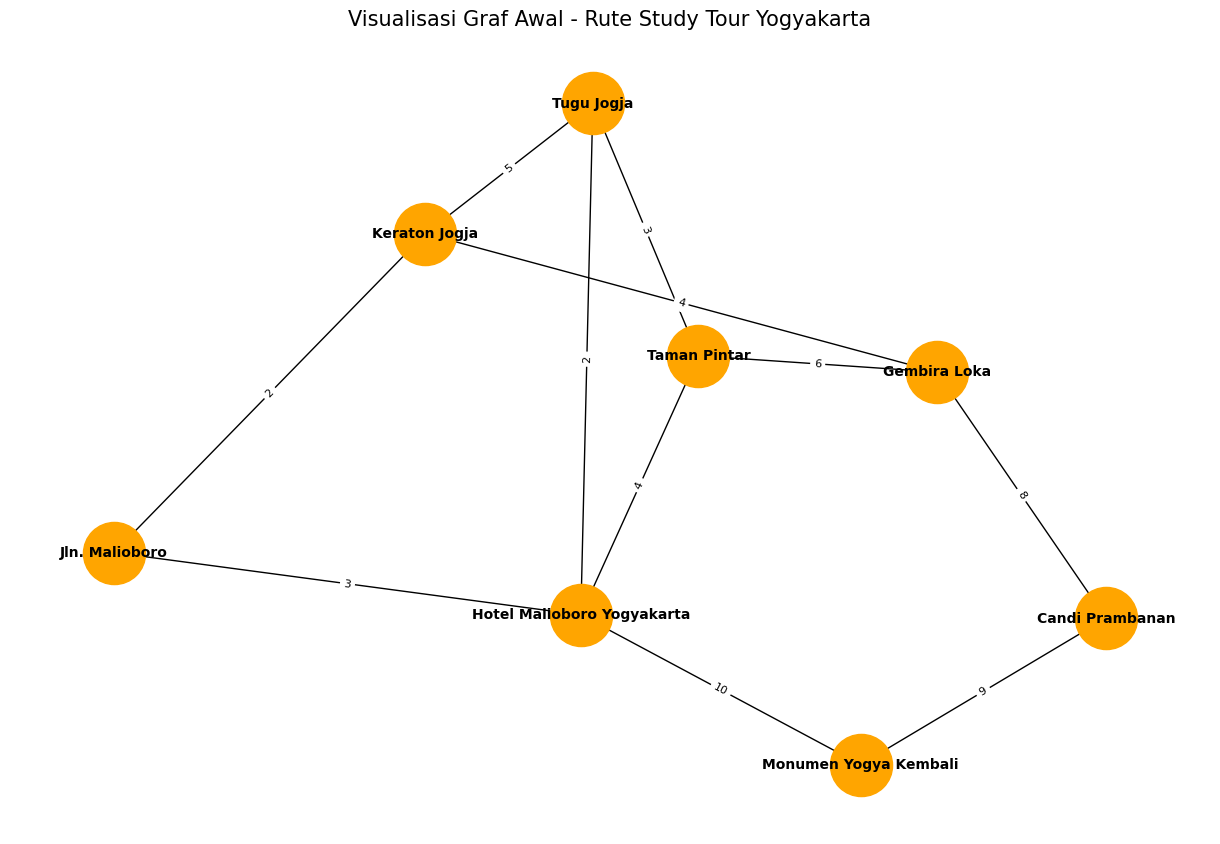

Total jarak: 56 km


In [ ]:
# Visualisasi graf awal
visualize_initial_graph(graph, title="Visualisasi Graf Awal - Rute Study Tour Yogyakarta")

def hitung_total_jarak(graph):
    # Set untuk menyimpan edge yang sudah dihitung
    counted_edges = set()
    total_distance = 0

    # Iterasi setiap node dan tetangganya
    for node in graph:
        for neighbor, distance in graph[node].items():
            # Membuat edge yang unik (diurutkan untuk menghindari duplikasi)
            edge = tuple(sorted([node, neighbor]))

            # Hanya menghitung jika edge belum pernah dihitung
            if edge not in counted_edges:
                total_distance += distance
                counted_edges.add(edge)

    return total_distance

# Menghitung total jarak
total = hitung_total_jarak(graph)
print(f"Total jarak: {total} km")


BACKTRACKING

In [ ]:
# Backtracking Implementation
def tsp_backtracking(graph, start):
    visited = set()  # Set to keep track of visited nodes
    best_path = []   # To store the best path found
    min_cost = [sys.maxsize]  # To store the minimum cost, initialized with a large value

    # Recursive function to perform depth-first search (DFS)
    def dfs(current, path, cost):
        # If all nodes have been visited, check if we can return to the start
        if len(path) == len(graph):
            if start in graph[current]:  # Check if there's a path back to the start
                total_cost = cost + graph[current][start]  # Complete the cycle
                if total_cost < min_cost[0]:  # Update best path and minimum cost if better
                    min_cost[0] = total_cost
                    best_path.clear()
                    best_path.extend(path + [start])
            return

        # Explore neighbors (unvisited nodes)
        for neighbor, distance in graph[current].items():
            if neighbor not in visited:
                visited.add(neighbor)
                dfs(neighbor, path + [neighbor], cost + distance)
                visited.remove(neighbor)  # Backtrack by removing the neighbor from visited

    visited.add(start)
    dfs(start, [start], 0)  # Start DFS from the start node
    return best_path, min_cost[0]

    # Run Backtracking
start_time = time.time()  # Record start time
back_path, back_cost = tsp_backtracking(graph, start_point)
back_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BACKTRACKING ===")
print(f"Best Path: {back_path}")
print(f"Total Cost: {back_cost}")
print(f"Execution Time: {back_time:.4f} seconds")

=== BACKTRACKING ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 46
Execution Time: 0.0002 seconds


BRUTE FORCE

In [ ]:
# Brute Force Implementation with Return to Start
def tsp_brute_force(graph, start):
    min_cost = sys.maxsize
    best_path = []
    nodes = list(graph.keys())
    nodes.remove(start)  # Remove the starting point from the list for permutations

    # Iterate over all permutations of the nodes except the starting point
    for perm in itertools.permutations(nodes):
        cost = 0
        valid = True
        path = [start] + list(perm)  # Start the path from the starting point

        # Calculate the cost for the path
        for i in range(len(path) - 1):
            if path[i + 1] in graph[path[i]]:
                cost += graph[path[i]][path[i + 1]]
            else:
                valid = False
                break

        # Add the cost to return to the start point to complete the cycle
        if valid and start in graph[path[-1]]:  # Ensure there's a path back to the start
            cost += graph[path[-1]][start]  # Add the return cost
            if cost < min_cost:
                min_cost = cost
                best_path = path + [start]  # Complete the cycle by returning to the start

    return best_path, min_cost

    # Run Brute Force
start_time = time.time()  # Record start time
brute_path, brute_cost = tsp_brute_force(graph, start_point)
brute_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BRUTE FORCE ===")
print(f"Best Path: {brute_path}")
print(f"Total Cost: {brute_cost}")
print(f"Execution Time: {brute_time:.4f} seconds")

=== BRUTE FORCE ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 46
Execution Time: 0.0093 seconds


GREEDY

In [ ]:
# Greedy Implementation
def tsp_greedy(graph, start):
    visited = set()
    path = [start]
    current = start
    total_cost = 0

    while len(visited) < len(graph):
        visited.add(current)
        next_node = None
        min_distance = sys.maxsize

        # Find the nearest unvisited neighbor
        for neighbor, distance in graph[current].items():
            if neighbor not in visited and distance < min_distance:
                next_node = neighbor
                min_distance = distance

        # If no more valid neighbors (incomplete graph case)
        if next_node is None:
            break

        # Move to the nearest neighbor
        path.append(next_node)
        total_cost += min_distance
        current = next_node

    # Return to the starting point to complete the cycle
    if start in graph[current]:
        path.append(start)
        total_cost += graph[current][start]

    return path, total_cost


# Run Greedy Algorithm
start_time = time.time()  # Record the start time
greedy_path, greedy_cost = tsp_greedy(graph, start_point)
greedy_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== GREEDY ===")
print(f"Path: {greedy_path}")
print(f"Total Cost: {greedy_cost}")
print(f"Execution Time: {greedy_time:.4f} seconds")

=== GREEDY ===
Path: ['Hotel Malioboro Yogyakarta', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Keraton Jogja', 'Jln. Malioboro', 'Hotel Malioboro Yogyakarta']
Total Cost: 20
Execution Time: 0.0001 seconds


In [ ]:
# Compare All Algorithms
def compare_algorithms(graph, start):
    # Brute Force
    start_time = time.time()
    brute_path, brute_cost = tsp_brute_force(graph, start)
    brute_time = time.time() - start_time

    # Backtracking
    start_time = time.time()
    back_path, back_cost = tsp_backtracking(graph, start)
    back_time = time.time() - start_time

    # Greedy
    start_time = time.time()
    greedy_path, greedy_cost = tsp_greedy(graph, start)
    greedy_time = time.time() - start_time

    # Print Results
    print("=== PERBANDINGAN ALGORITMA ===")
    print(f"Brute Force   : Cost = {brute_cost}, Time = {brute_time:.4f} seconds, Path = {brute_path}")
    print(f"Backtracking  : Cost = {back_cost}, Time = {back_time:.4f} seconds, Path = {back_path}")
    print(f"Greedy        : Cost = {greedy_cost}, Time = {greedy_time:.4f} seconds, Path = {greedy_path}")

# Jalankan Perbandingan
compare_algorithms(graph, start_point)


=== PERBANDINGAN ALGORITMA ===
Brute Force   : Cost = 46, Time = 0.0054 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Backtracking  : Cost = 46, Time = 0.0001 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Greedy        : Cost = 20, Time = 0.0000 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Keraton Jogja', 'Jln. Malioboro', 'Hotel Malioboro Yogyakarta']


# **GRAF 3**

In [ ]:
# Representasi graf dengan jarak antar lokasi (berbentuk dictionary)
graph = {
    'Hotel Malioboro Yogyakarta': {'Tugu Jogja': 4, 'Taman Pintar': 6, 'Jln. Malioboro': 2},
    'Tugu Jogja': {'Hotel Malioboro Yogyakarta': 2, 'Taman Pintar': 3, 'Keraton Jogja': 7},
    'Taman Pintar': {'Hotel Malioboro Yogyakarta': 5, 'Tugu Jogja': 6, 'Gembira Loka': 2},
    'Jln. Malioboro': {'Hotel Malioboro Yogyakarta': 5, 'Keraton Jogja': 4},
    'Keraton Jogja': {'Tugu Jogja': 7, 'Jln. Malioboro': 2, 'Gembira Loka': 4},
    'Gembira Loka': {'Taman Pintar': 4, 'Keraton Jogja': 4, 'Candi Prambanan': 3},
    'Candi Prambanan': {'Gembira Loka': 5, 'Monumen Yogya Kembali': 9},
    'Monumen Yogya Kembali': {'Candi Prambanan': 10, 'Hotel Malioboro Yogyakarta': 11}
}

start_point = "Hotel Malioboro Yogyakarta"



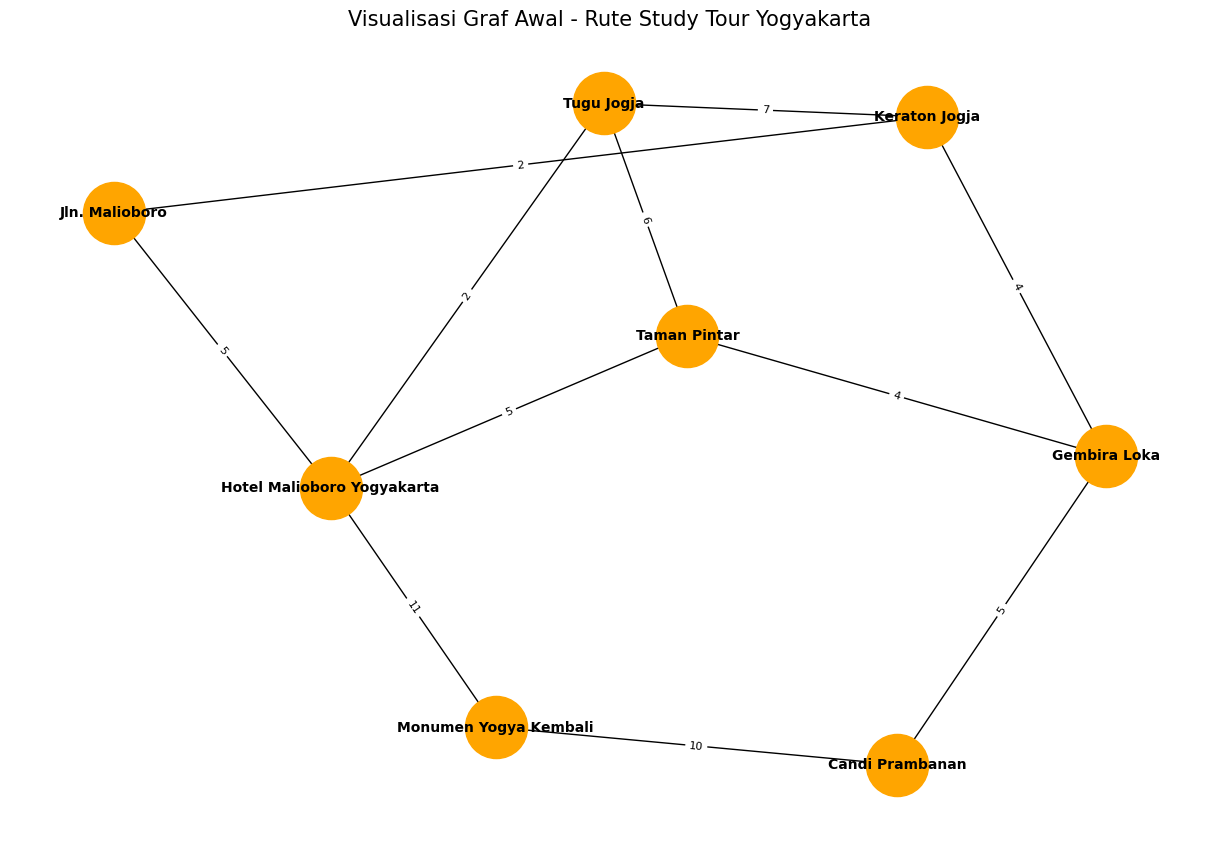

Total jarak: 55 km


In [ ]:
# Visualisasi graf awal
visualize_initial_graph(graph, title="Visualisasi Graf Awal - Rute Study Tour Yogyakarta")

def hitung_total_jarak(graph):
    # Set untuk menyimpan edge yang sudah dihitung
    counted_edges = set()
    total_distance = 0

    # Iterasi setiap node dan tetangganya
    for node in graph:
        for neighbor, distance in graph[node].items():
            # Membuat edge yang unik (diurutkan untuk menghindari duplikasi)
            edge = tuple(sorted([node, neighbor]))

            # Hanya menghitung jika edge belum pernah dihitung
            if edge not in counted_edges:
                total_distance += distance
                counted_edges.add(edge)

    return total_distance

# Menghitung total jarak
total = hitung_total_jarak(graph)
print(f"Total jarak: {total} km")

Backtracking

In [ ]:
# Backtracking Implementation
def tsp_backtracking(graph, start):
    visited = set()  # Set to keep track of visited nodes
    best_path = []   # To store the best path found
    min_cost = [sys.maxsize]  # To store the minimum cost, initialized with a large value

    # Recursive function to perform depth-first search (DFS)
    def dfs(current, path, cost):
        # If all nodes have been visited, check if we can return to the start
        if len(path) == len(graph):
            if start in graph[current]:  # Check if there's a path back to the start
                total_cost = cost + graph[current][start]  # Complete the cycle
                if total_cost < min_cost[0]:  # Update best path and minimum cost if better
                    min_cost[0] = total_cost
                    best_path.clear()
                    best_path.extend(path + [start])
            return

        # Explore neighbors (unvisited nodes)
        for neighbor, distance in graph[current].items():
            if neighbor not in visited:
                visited.add(neighbor)
                dfs(neighbor, path + [neighbor], cost + distance)
                visited.remove(neighbor)  # Backtrack by removing the neighbor from visited

    visited.add(start)
    dfs(start, [start], 0)  # Start DFS from the start node
    return best_path, min_cost[0]

    # Run Backtracking
start_time = time.time()  # Record start time
back_path, back_cost = tsp_backtracking(graph, start_point)
back_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BACKTRACKING ===")
print(f"Best Path: {back_path}")
print(f"Total Cost: {back_cost}")
print(f"Execution Time: {back_time:.4f} seconds")

=== BACKTRACKING ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 41
Execution Time: 0.0002 seconds


BRUTE FORCE

In [ ]:
# Brute Force Implementation with Return to Start
def tsp_brute_force(graph, start):
    min_cost = sys.maxsize
    best_path = []
    nodes = list(graph.keys())
    nodes.remove(start)  # Remove the starting point from the list for permutations

    # Iterate over all permutations of the nodes except the starting point
    for perm in itertools.permutations(nodes):
        cost = 0
        valid = True
        path = [start] + list(perm)  # Start the path from the starting point

        # Calculate the cost for the path
        for i in range(len(path) - 1):
            if path[i + 1] in graph[path[i]]:
                cost += graph[path[i]][path[i + 1]]
            else:
                valid = False
                break

        # Add the cost to return to the start point to complete the cycle
        if valid and start in graph[path[-1]]:  # Ensure there's a path back to the start
            cost += graph[path[-1]][start]  # Add the return cost
            if cost < min_cost:
                min_cost = cost
                best_path = path + [start]  # Complete the cycle by returning to the start

    return best_path, min_cost

    # Run Brute Force
start_time = time.time()  # Record start time
brute_path, brute_cost = tsp_brute_force(graph, start_point)
brute_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BRUTE FORCE ===")
print(f"Best Path: {brute_path}")
print(f"Total Cost: {brute_cost}")
print(f"Execution Time: {brute_time:.4f} seconds")

=== BRUTE FORCE ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 41
Execution Time: 0.0068 seconds


GREEDY

In [ ]:
# Greedy Implementation
def tsp_greedy(graph, start):
    visited = set()
    path = [start]
    current = start
    total_cost = 0

    while len(visited) < len(graph):
        visited.add(current)
        next_node = None
        min_distance = sys.maxsize

        # Find the nearest unvisited neighbor
        for neighbor, distance in graph[current].items():
            if neighbor not in visited and distance < min_distance:
                next_node = neighbor
                min_distance = distance

        # If no more valid neighbors (incomplete graph case)
        if next_node is None:
            break

        # Move to the nearest neighbor
        path.append(next_node)
        total_cost += min_distance
        current = next_node

    # Return to the starting point to complete the cycle
    if start in graph[current]:
        path.append(start)
        total_cost += graph[current][start]

    return path, total_cost


# Run Greedy Algorithm
start_time = time.time()  # Record the start time
greedy_path, greedy_cost = tsp_greedy(graph, start_point)
greedy_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== GREEDY ===")
print(f"Path: {greedy_path}")
print(f"Total Cost: {greedy_cost}")
print(f"Execution Time: {greedy_time:.4f} seconds")

=== GREEDY ===
Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 33
Execution Time: 0.0001 seconds


In [ ]:
# Compare All Algorithms
def compare_algorithms(graph, start):
    # Brute Force
    start_time = time.time()
    brute_path, brute_cost = tsp_brute_force(graph, start)
    brute_time = time.time() - start_time

    # Backtracking
    start_time = time.time()
    back_path, back_cost = tsp_backtracking(graph, start)
    back_time = time.time() - start_time

    # Greedy
    start_time = time.time()
    greedy_path, greedy_cost = tsp_greedy(graph, start)
    greedy_time = time.time() - start_time

    # Print Results
    print("=== PERBANDINGAN ALGORITMA ===")
    print(f"Brute Force   : Cost = {brute_cost}, Time = {brute_time:.4f} seconds, Path = {brute_path}")
    print(f"Backtracking  : Cost = {back_cost}, Time = {back_time:.4f} seconds, Path = {back_path}")
    print(f"Greedy        : Cost = {greedy_cost}, Time = {greedy_time:.4f} seconds, Path = {greedy_path}")

# Jalankan Perbandingan
compare_algorithms(graph, start_point)


=== PERBANDINGAN ALGORITMA ===
Brute Force   : Cost = 41, Time = 0.0054 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Backtracking  : Cost = 41, Time = 0.0001 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Greedy        : Cost = 33, Time = 0.0000 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']


# **GRAF 4**

In [ ]:
# Representasi graf dengan jarak antar lokasi (berbentuk dictionary)
graph = {
    'Hotel Malioboro Yogyakarta': {'Tugu Jogja': 5, 'Taman Pintar': 8, 'Jln. Malioboro': 4},
    'Tugu Jogja': {'Hotel Malioboro Yogyakarta': 4, 'Taman Pintar': 6, 'Keraton Jogja': 10},
    'Taman Pintar': {'Hotel Malioboro Yogyakarta': 7, 'Tugu Jogja': 8, 'Gembira Loka': 3},
    'Jln. Malioboro': {'Hotel Malioboro Yogyakarta': 6, 'Keraton Jogja': 5},
    'Keraton Jogja': {'Tugu Jogja': 10, 'Jln. Malioboro': 3, 'Gembira Loka': 6},
    'Gembira Loka': {'Taman Pintar': 6, 'Keraton Jogja': 5, 'Candi Prambanan': 4},
    'Candi Prambanan': {'Gembira Loka': 6, 'Monumen Yogya Kembali': 12},
    'Monumen Yogya Kembali': {'Candi Prambanan': 12, 'Hotel Malioboro Yogyakarta': 14}
}

start_point = "Hotel Malioboro Yogyakarta"


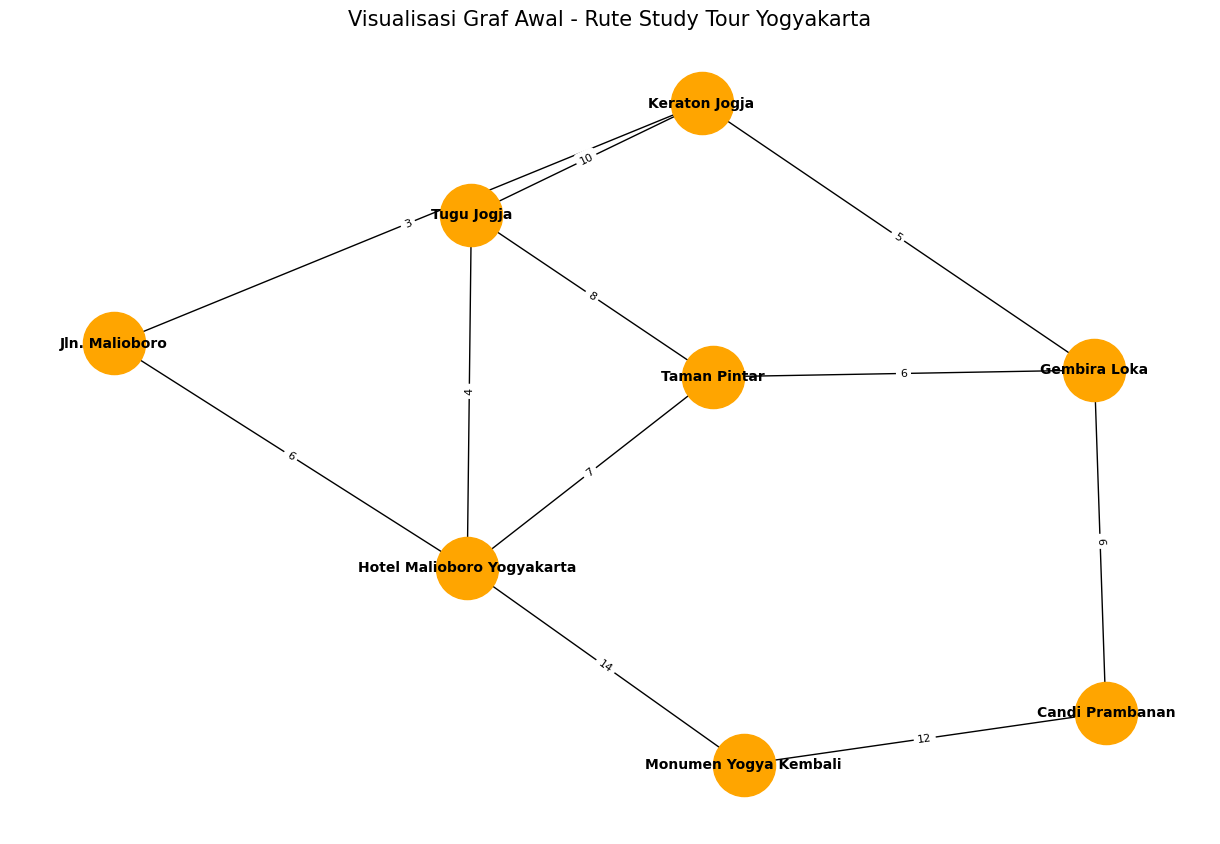

Total jarak: 77 km


In [ ]:
# Visualisasi graf awal
visualize_initial_graph(graph, title="Visualisasi Graf Awal - Rute Study Tour Yogyakarta")

def hitung_total_jarak(graph):
    # Set untuk menyimpan edge yang sudah dihitung
    counted_edges = set()
    total_distance = 0

    # Iterasi setiap node dan tetangganya
    for node in graph:
        for neighbor, distance in graph[node].items():
            # Membuat edge yang unik (diurutkan untuk menghindari duplikasi)
            edge = tuple(sorted([node, neighbor]))

            # Hanya menghitung jika edge belum pernah dihitung
            if edge not in counted_edges:
                total_distance += distance
                counted_edges.add(edge)

    return total_distance

# Menghitung total jarak
total = hitung_total_jarak(graph)
print(f"Total jarak: {total} km")


Backtracking

In [ ]:
# Backtracking Implementation
def tsp_backtracking(graph, start):
    visited = set()  # Set to keep track of visited nodes
    best_path = []   # To store the best path found
    min_cost = [sys.maxsize]  # To store the minimum cost, initialized with a large value

    # Recursive function to perform depth-first search (DFS)
    def dfs(current, path, cost):
        # If all nodes have been visited, check if we can return to the start
        if len(path) == len(graph):
            if start in graph[current]:  # Check if there's a path back to the start
                total_cost = cost + graph[current][start]  # Complete the cycle
                if total_cost < min_cost[0]:  # Update best path and minimum cost if better
                    min_cost[0] = total_cost
                    best_path.clear()
                    best_path.extend(path + [start])
            return

        # Explore neighbors (unvisited nodes)
        for neighbor, distance in graph[current].items():
            if neighbor not in visited:
                visited.add(neighbor)
                dfs(neighbor, path + [neighbor], cost + distance)
                visited.remove(neighbor)  # Backtrack by removing the neighbor from visited

    visited.add(start)
    dfs(start, [start], 0)  # Start DFS from the start node
    return best_path, min_cost[0]

    # Run Backtracking
start_time = time.time()  # Record start time
back_path, back_cost = tsp_backtracking(graph, start_point)
back_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BACKTRACKING ===")
print(f"Best Path: {back_path}")
print(f"Total Cost: {back_cost}")
print(f"Execution Time: {back_time:.4f} seconds")

=== BACKTRACKING ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 58
Execution Time: 0.0002 seconds


BRUTE FORCE

In [ ]:
# Brute Force Implementation with Return to Start
def tsp_brute_force(graph, start):
    min_cost = sys.maxsize
    best_path = []
    nodes = list(graph.keys())
    nodes.remove(start)  # Remove the starting point from the list for permutations

    # Iterate over all permutations of the nodes except the starting point
    for perm in itertools.permutations(nodes):
        cost = 0
        valid = True
        path = [start] + list(perm)  # Start the path from the starting point

        # Calculate the cost for the path
        for i in range(len(path) - 1):
            if path[i + 1] in graph[path[i]]:
                cost += graph[path[i]][path[i + 1]]
            else:
                valid = False
                break

        # Add the cost to return to the start point to complete the cycle
        if valid and start in graph[path[-1]]:  # Ensure there's a path back to the start
            cost += graph[path[-1]][start]  # Add the return cost
            if cost < min_cost:
                min_cost = cost
                best_path = path + [start]  # Complete the cycle by returning to the start

    return best_path, min_cost

    # Run Brute Force
start_time = time.time()  # Record start time
brute_path, brute_cost = tsp_brute_force(graph, start_point)
brute_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BRUTE FORCE ===")
print(f"Best Path: {brute_path}")
print(f"Total Cost: {brute_cost}")
print(f"Execution Time: {brute_time:.4f} seconds")

=== BRUTE FORCE ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 58
Execution Time: 0.0111 seconds


GREEDY

In [ ]:
# Greedy Implementation
def tsp_greedy(graph, start):
    visited = set()
    path = [start]
    current = start
    total_cost = 0

    while len(visited) < len(graph):
        visited.add(current)
        next_node = None
        min_distance = sys.maxsize

        # Find the nearest unvisited neighbor
        for neighbor, distance in graph[current].items():
            if neighbor not in visited and distance < min_distance:
                next_node = neighbor
                min_distance = distance

        # If no more valid neighbors (incomplete graph case)
        if next_node is None:
            break

        # Move to the nearest neighbor
        path.append(next_node)
        total_cost += min_distance
        current = next_node

    # Return to the starting point to complete the cycle
    if start in graph[current]:
        path.append(start)
        total_cost += graph[current][start]

    return path, total_cost


# Run Greedy Algorithm
start_time = time.time()  # Record the start time
greedy_path, greedy_cost = tsp_greedy(graph, start_point)
greedy_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== GREEDY ===")
print(f"Path: {greedy_path}")
print(f"Total Cost: {greedy_cost}")
print(f"Execution Time: {greedy_time:.4f} seconds")

=== GREEDY ===
Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 45
Execution Time: 0.0001 seconds


In [ ]:
# Compare All Algorithms
def compare_algorithms(graph, start):
    # Brute Force
    start_time = time.time()
    brute_path, brute_cost = tsp_brute_force(graph, start)
    brute_time = time.time() - start_time

    # Backtracking
    start_time = time.time()
    back_path, back_cost = tsp_backtracking(graph, start)
    back_time = time.time() - start_time

    # Greedy
    start_time = time.time()
    greedy_path, greedy_cost = tsp_greedy(graph, start)
    greedy_time = time.time() - start_time

    # Print Results
    print("=== PERBANDINGAN ALGORITMA ===")
    print(f"Brute Force   : Cost = {brute_cost}, Time = {brute_time:.4f} seconds, Path = {brute_path}")
    print(f"Backtracking  : Cost = {back_cost}, Time = {back_time:.4f} seconds, Path = {back_path}")
    print(f"Greedy        : Cost = {greedy_cost}, Time = {greedy_time:.4f} seconds, Path = {greedy_path}")

# Jalankan Perbandingan
compare_algorithms(graph, start_point)


=== PERBANDINGAN ALGORITMA ===
Brute Force   : Cost = 58, Time = 0.0139 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Backtracking  : Cost = 58, Time = 0.0001 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Greedy        : Cost = 45, Time = 0.0000 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']


# **GRAF 5**

In [ ]:
# Representasi graf dengan jarak yang dimodifikasi
graph = {
    'Hotel Malioboro Yogyakarta': {'Tugu Jogja': 7, 'Taman Pintar': 10, 'Jln. Malioboro': 6},
    'Tugu Jogja': {'Hotel Malioboro Yogyakarta': 7, 'Taman Pintar': 8, 'Keraton Jogja': 12},
    'Taman Pintar': {'Hotel Malioboro Yogyakarta': 10, 'Tugu Jogja': 8, 'Gembira Loka': 5},
    'Jln. Malioboro': {'Hotel Malioboro Yogyakarta': 6, 'Keraton Jogja': 7},
    'Keraton Jogja': {'Tugu Jogja': 12, 'Jln. Malioboro': 7, 'Gembira Loka': 8},
    'Gembira Loka': {'Taman Pintar': 5, 'Keraton Jogja': 8, 'Candi Prambanan': 6},
    'Candi Prambanan': {'Gembira Loka': 6, 'Monumen Yogya Kembali': 15},
    'Monumen Yogya Kembali': {'Candi Prambanan': 15, 'Hotel Malioboro Yogyakarta': 16}
}



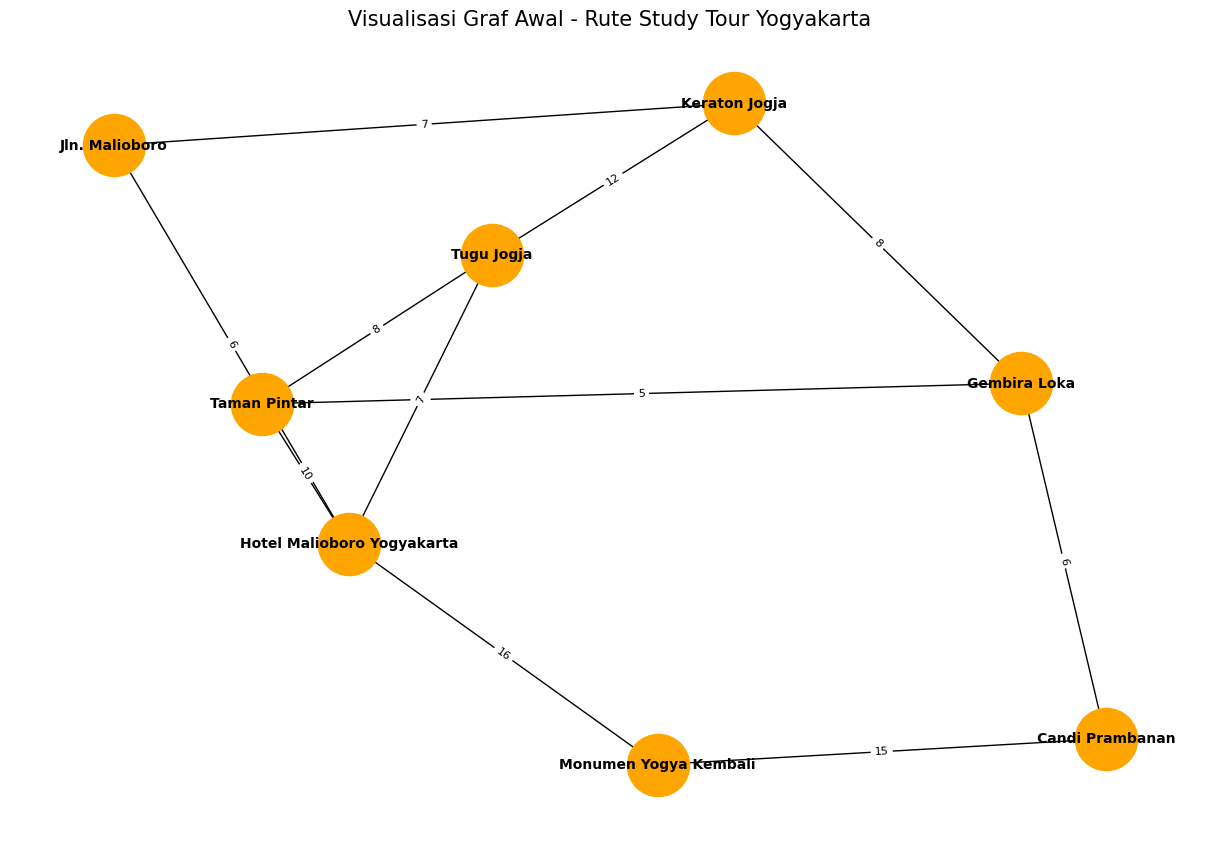

Total jarak: 100 km


In [ ]:
# Visualisasi graf awal
visualize_initial_graph(graph, title="Visualisasi Graf Awal - Rute Study Tour Yogyakarta")

def hitung_total_jarak(graph):
    # Set untuk menyimpan edge yang sudah dihitung
    counted_edges = set()
    total_distance = 0

    # Iterasi setiap node dan tetangganya
    for node in graph:
        for neighbor, distance in graph[node].items():
            # Membuat edge yang unik (diurutkan untuk menghindari duplikasi)
            edge = tuple(sorted([node, neighbor]))

            # Hanya menghitung jika edge belum pernah dihitung
            if edge not in counted_edges:
                total_distance += distance
                counted_edges.add(edge)

    return total_distance

# Menghitung total jarak
total = hitung_total_jarak(graph)
print(f"Total jarak: {total} km")

Backtracking

In [ ]:
# Backtracking Implementation
def tsp_backtracking(graph, start):
    visited = set()  # Set to keep track of visited nodes
    best_path = []   # To store the best path found
    min_cost = [sys.maxsize]  # To store the minimum cost, initialized with a large value

    # Recursive function to perform depth-first search (DFS)
    def dfs(current, path, cost):
        # If all nodes have been visited, check if we can return to the start
        if len(path) == len(graph):
            if start in graph[current]:  # Check if there's a path back to the start
                total_cost = cost + graph[current][start]  # Complete the cycle
                if total_cost < min_cost[0]:  # Update best path and minimum cost if better
                    min_cost[0] = total_cost
                    best_path.clear()
                    best_path.extend(path + [start])
            return

        # Explore neighbors (unvisited nodes)
        for neighbor, distance in graph[current].items():
            if neighbor not in visited:
                visited.add(neighbor)
                dfs(neighbor, path + [neighbor], cost + distance)
                visited.remove(neighbor)  # Backtrack by removing the neighbor from visited

    visited.add(start)
    dfs(start, [start], 0)  # Start DFS from the start node
    return best_path, min_cost[0]

    # Run Backtracking
start_time = time.time()  # Record start time
back_path, back_cost = tsp_backtracking(graph, start_point)
back_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BACKTRACKING ===")
print(f"Best Path: {back_path}")
print(f"Total Cost: {back_cost}")
print(f"Execution Time: {back_time:.4f} seconds")

=== BACKTRACKING ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 75
Execution Time: 0.0002 seconds


BRUTE FORCE

In [ ]:
# Brute Force Implementation with Return to Start
def tsp_brute_force(graph, start):
    min_cost = sys.maxsize
    best_path = []
    nodes = list(graph.keys())
    nodes.remove(start)  # Remove the starting point from the list for permutations

    # Iterate over all permutations of the nodes except the starting point
    for perm in itertools.permutations(nodes):
        cost = 0
        valid = True
        path = [start] + list(perm)  # Start the path from the starting point

        # Calculate the cost for the path
        for i in range(len(path) - 1):
            if path[i + 1] in graph[path[i]]:
                cost += graph[path[i]][path[i + 1]]
            else:
                valid = False
                break

        # Add the cost to return to the start point to complete the cycle
        if valid and start in graph[path[-1]]:  # Ensure there's a path back to the start
            cost += graph[path[-1]][start]  # Add the return cost
            if cost < min_cost:
                min_cost = cost
                best_path = path + [start]  # Complete the cycle by returning to the start

    return best_path, min_cost

    # Run Brute Force
start_time = time.time()  # Record start time
brute_path, brute_cost = tsp_brute_force(graph, start_point)
brute_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== BRUTE FORCE ===")
print(f"Best Path: {brute_path}")
print(f"Total Cost: {brute_cost}")
print(f"Execution Time: {brute_time:.4f} seconds")

=== BRUTE FORCE ===
Best Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Total Cost: 75
Execution Time: 0.0066 seconds


GREEDY

In [ ]:
# Greedy Implementation
def tsp_greedy(graph, start):
    visited = set()
    path = [start]
    current = start
    total_cost = 0

    while len(visited) < len(graph):
        visited.add(current)
        next_node = None
        min_distance = sys.maxsize

        # Find the nearest unvisited neighbor
        for neighbor, distance in graph[current].items():
            if neighbor not in visited and distance < min_distance:
                next_node = neighbor
                min_distance = distance

        # If no more valid neighbors (incomplete graph case)
        if next_node is None:
            break

        # Move to the nearest neighbor
        path.append(next_node)
        total_cost += min_distance
        current = next_node

    # Return to the starting point to complete the cycle
    if start in graph[current]:
        path.append(start)
        total_cost += graph[current][start]

    return path, total_cost


# Run Greedy Algorithm
start_time = time.time()  # Record the start time
greedy_path, greedy_cost = tsp_greedy(graph, start_point)
greedy_time = time.time() - start_time  # Calculate execution time

# Output the result
print("=== GREEDY ===")
print(f"Path: {greedy_path}")
print(f"Total Cost: {greedy_cost}")
print(f"Execution Time: {greedy_time:.4f} seconds")

=== GREEDY ===
Path: ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Taman Pintar', 'Tugu Jogja', 'Hotel Malioboro Yogyakarta']
Total Cost: 41
Execution Time: 0.0001 seconds


In [ ]:
# Compare All Algorithms
def compare_algorithms(graph, start):
    # Brute Force
    start_time = time.time()
    brute_path, brute_cost = tsp_brute_force(graph, start)
    brute_time = time.time() - start_time

    # Backtracking
    start_time = time.time()
    back_path, back_cost = tsp_backtracking(graph, start)
    back_time = time.time() - start_time

    # Greedy
    start_time = time.time()
    greedy_path, greedy_cost = tsp_greedy(graph, start)
    greedy_time = time.time() - start_time

    # Print Results
    print("=== PERBANDINGAN ALGORITMA ===")
    print(f"Brute Force   : Cost = {brute_cost}, Time = {brute_time:.4f} seconds, Path = {brute_path}")
    print(f"Backtracking  : Cost = {back_cost}, Time = {back_time:.4f} seconds, Path = {back_path}")
    print(f"Greedy        : Cost = {greedy_cost}, Time = {greedy_time:.4f} seconds, Path = {greedy_path}")

# Jalankan Perbandingan
compare_algorithms(graph, start_point)


=== PERBANDINGAN ALGORITMA ===
Brute Force   : Cost = 75, Time = 0.0052 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Backtracking  : Cost = 75, Time = 0.0001 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Tugu Jogja', 'Taman Pintar', 'Gembira Loka', 'Candi Prambanan', 'Monumen Yogya Kembali', 'Hotel Malioboro Yogyakarta']
Greedy        : Cost = 41, Time = 0.0000 seconds, Path = ['Hotel Malioboro Yogyakarta', 'Jln. Malioboro', 'Keraton Jogja', 'Gembira Loka', 'Taman Pintar', 'Tugu Jogja', 'Hotel Malioboro Yogyakarta']
